# 11-F63.ipynb

This notebook performs the segmentation workflow adapted for the compressed F50 sand experiment and adds a step to convert the segmented voxels to tri-meshes to be saved as STLs.

# Import packages

In [1]:
# Standard library imports
from pathlib import Path
# Third-party imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
# Local module imports
from segmentflow import segment, view
# Enable autoreload packages for changes made to local modules
%load_ext autoreload
%autoreload 2

# Perform Segmentation

## Load 3D data

Passing `slice_crop`, `row_crop`, and `col_crop` to only load part of the dataset

Loading images...
--> Images loaded as 3D array:  (150, 150, 150)
Plotting images: [  0  74 149]


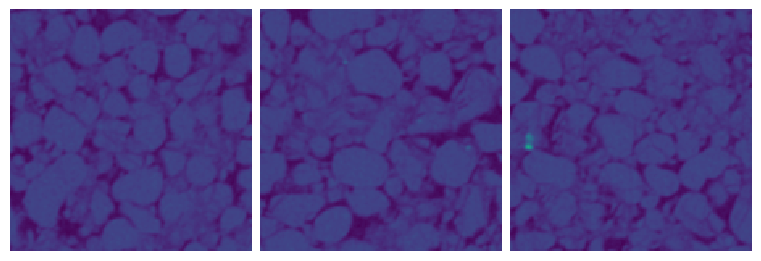

In [2]:
# Load images as 3D array from a directory containing images
imgs = segment.load_images(
    Path('../data/F63tiff'),
    slice_crop=[400, 550],
    row_crop=[400, 550],
    col_crop=[400, 550],
    convert_to_float=True,
    file_suffix='tiff'
)
slices = np.linspace(0, 149, 3).astype(int)
fig, axes = view.plot_slices(imgs, slices=slices)

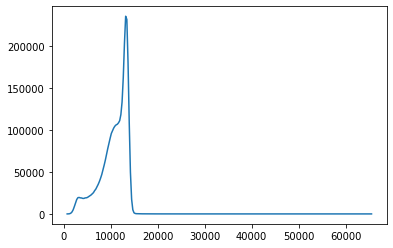

In [3]:
hist, bin_edges = np.histogram(imgs, bins=256)
fig, ax = plt.subplots()
ax.plot(bin_edges[1:], hist)
plt.show()

Binarizing images...
--> Calculating Otsu threshold(s)...
--> Binarization complete.
Plotting images: [  0  74 149]


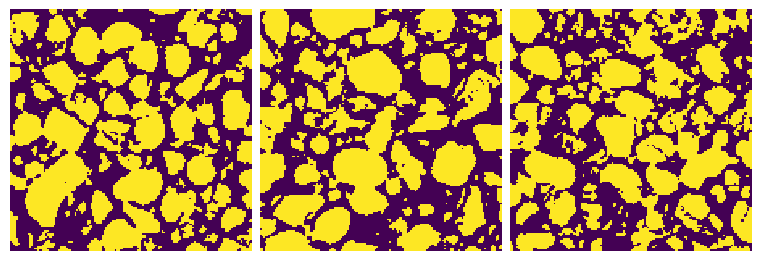

In [22]:
imgs_binarized, thresh_vals = segment.binarize_multiotsu(
    imgs, n_otsu_classes=3, n_selected_thresholds=1
)
fig, axes = view.plot_slices(imgs_binarized, slices=slices)

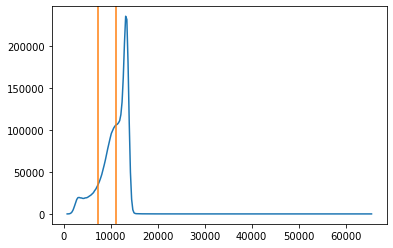

In [17]:
hist, bin_edges = np.histogram(imgs, bins=256)
fig, ax = plt.subplots()
ax.plot(bin_edges[1:], hist)
for val in thresh_vals:
    ax.axvline(val, color='C1', zorder=2)
plt.show()

Plotting images: [  0  74 149]


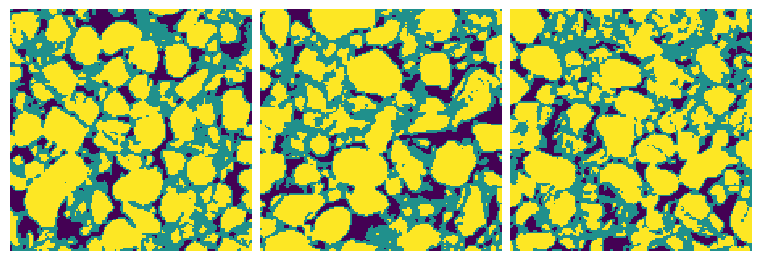

In [16]:
imgs_semantic = segment.isolate_classes(imgs, thresh_vals)
fig, axes = view.plot_slices(imgs_semantic, slices=slices)

Segmenting images...
--> Segmentation complete. 532 particle(s) segmented.


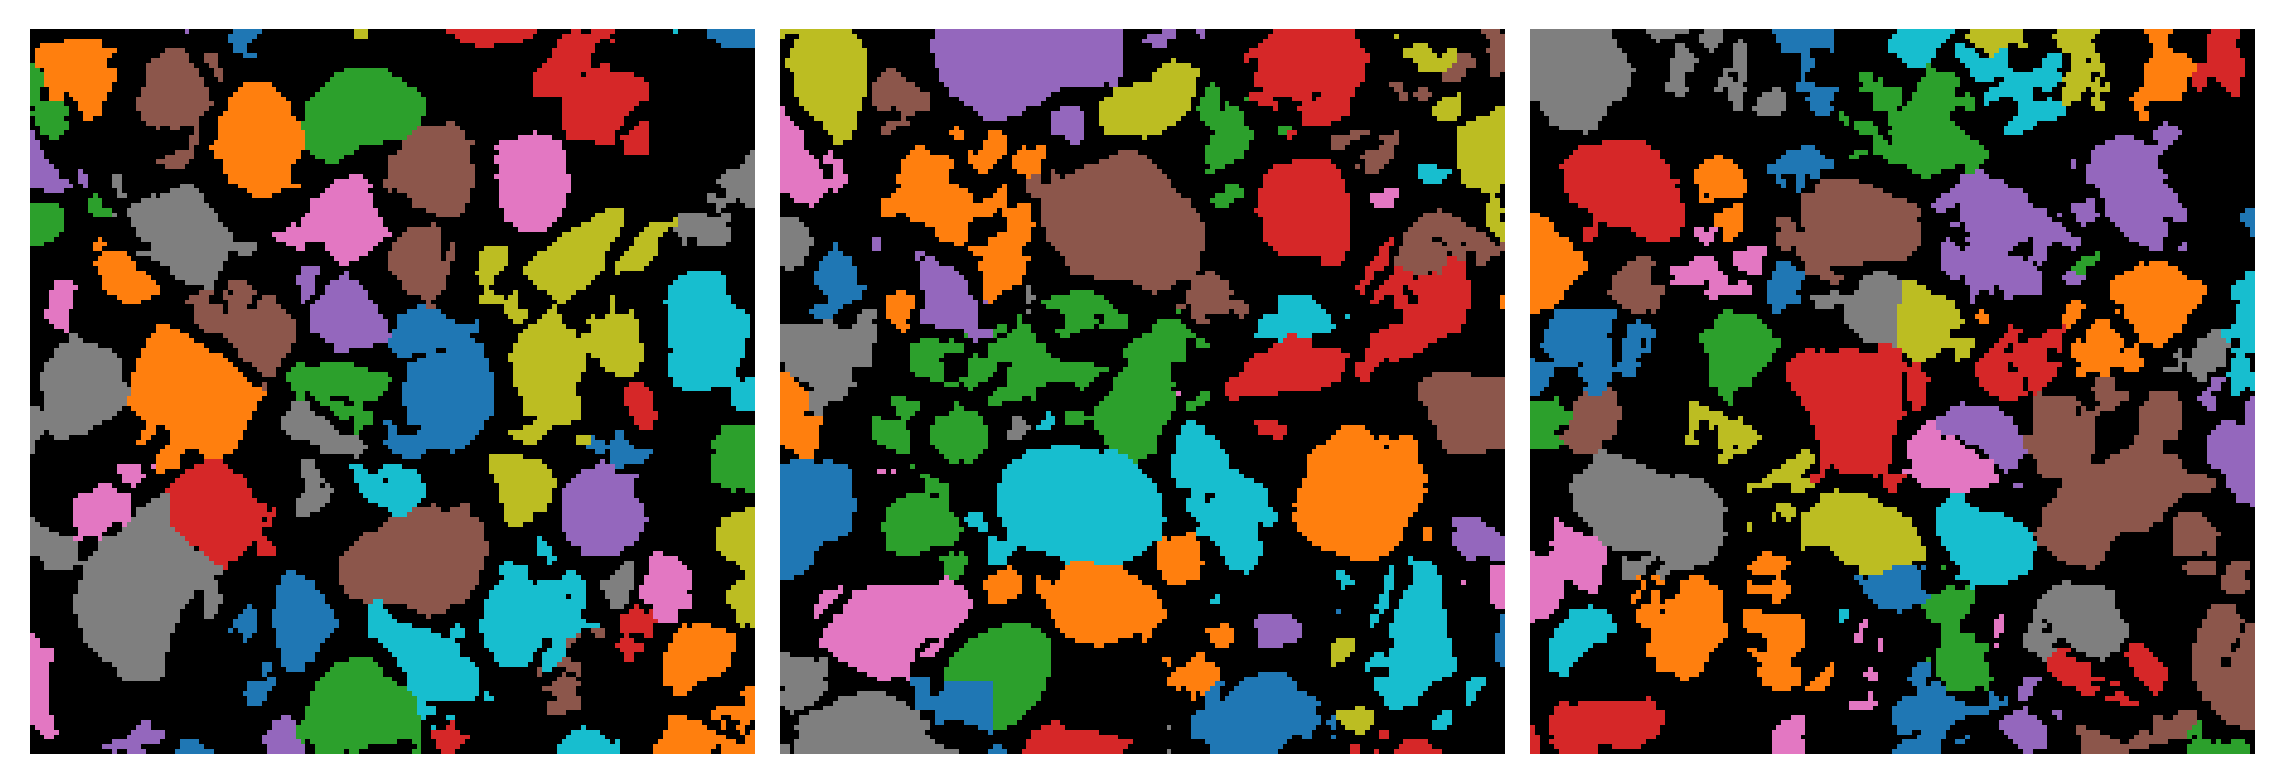

In [8]:
segment_dict = segment.watershed_segment(
    imgs_binarized,
    min_peak_distance=7,
    return_dict=True
)
colors = view.get_colors(10, cmap=mpl.cm.tab10)
labeled_color = [
    color.label2rgb(
        segment_dict['integer-labels'][i, ...], bg_label=0, colors=colors
    ) for i in slices
]
fig, axes = view.plot_images(labeled_color, dpi=300)

Plotting images: [  0  74 149]


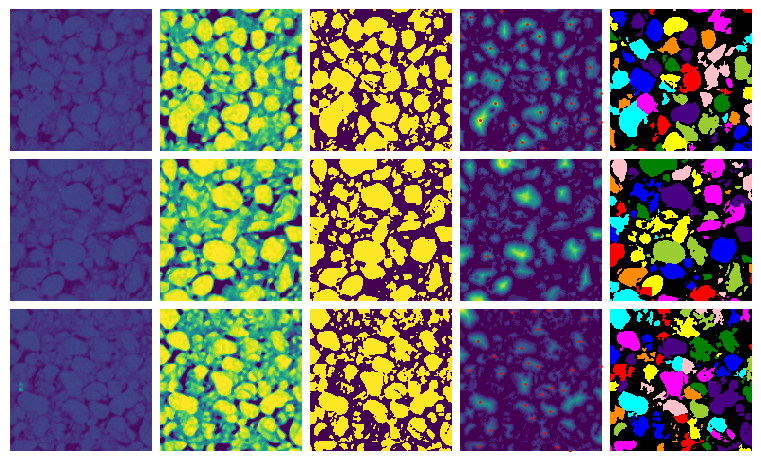

In [9]:
fig, axes = view.plot_segment_steps(
    imgs, imgs_pre, imgs_binarized, segment_dict, slices=slices
)
plt.show()

## Preprocess data

Preprocessing images...
--> Applying median filter...
--> Rescaling intensities to percentile range [5, 95]...
--> Preprocessing complete
Plotting images: [  0  74 149]


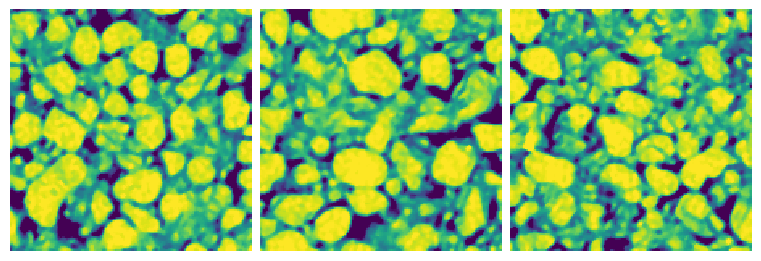

In [4]:
imgs_pre = segment.preprocess(
    imgs, median_filter=True, rescale_intensity_range=[5, 95]
)
fig, axes = view.plot_slices(imgs_pre, slices=slices)

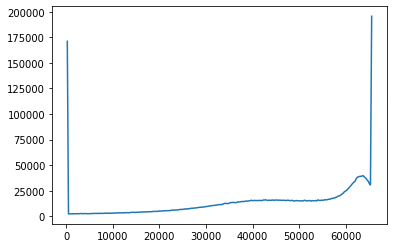

In [5]:
hist, bin_edges = np.histogram(imgs_pre, bins=256)
fig, ax = plt.subplots()
ax.plot(bin_edges[1:], hist)
plt.show()

### Segment Data

### Binarize data

Binarizing images...
--> Calculating Otsu threshold(s)...
--> Binarization complete.
Plotting images: [  0  74 149]


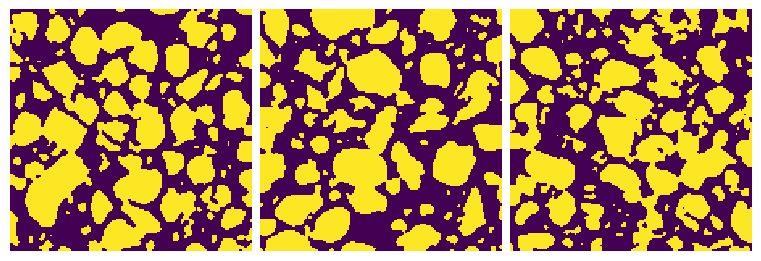

In [19]:
imgs_binarized, thresh_vals = segment.binarize_multiotsu(
    imgs_pre, n_otsu_classes=3, n_selected_thresholds=1
)
fig, axes = view.plot_slices(imgs_binarized, slices=slices)

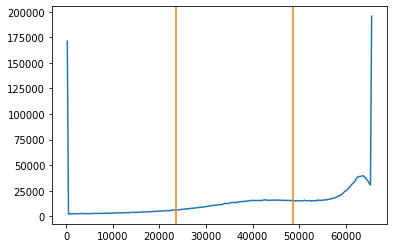

In [20]:
hist, bin_edges = np.histogram(imgs_pre, bins=256)
fig, ax = plt.subplots()
ax.plot(bin_edges[1:], hist)
for val in thresh_vals:
    ax.axvline(val, color='C1', zorder=2)
plt.show()

Plotting images: [  0  74 149]


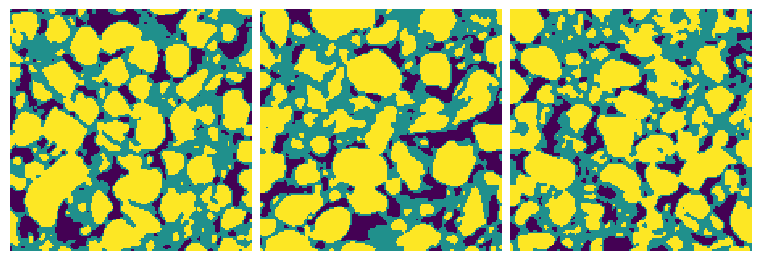

In [21]:
imgs_semantic = segment.isolate_classes(imgs_pre, thresh_vals)
fig, axes = view.plot_slices(imgs_semantic, slices=slices)